[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error: 1333262352687.269
Parametros [w,b] [-2.63851639e+07  8.54759155e+06  4.08098760e+07  2.53976953e+07
 -5.05031580e+07  3.38649871e+05  4.03722864e+05  1.83838932e+05
 -8.80229998e+04 -2.54531477e+03]


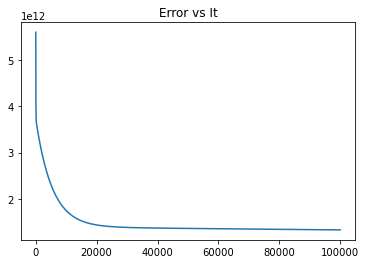

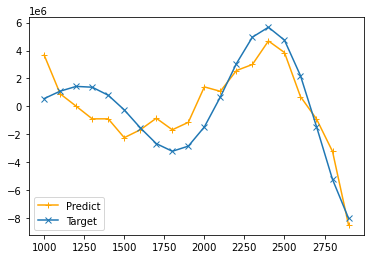

[-1.64750894 -1.38210305 -1.1713459  -1.01048819 -0.88942616 -0.02476877
  0.69453579  0.75774373 -1.82348303]
[  515229.99491131   621637.88512186   755437.27337657   905482.15215807
  1060718.63341291  -359074.72495482  -123515.69818974 -1107236.16712401
   656061.44244458     2645.31477367]


In [7]:
#Dada una función cualquiera, intentaré ajustar otras diferentes funciones, normalmente se usan polinómicas
#como una serie de taylor pero con datos aleatorios

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(10,30)*100
Y = np.cos(X)*(X**2)
Xeng = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]

def dJ(w,b,x,y):
    f=x@w+b-y
    ans=np.sum(f[:,np.newaxis]*np.c_[x,np.ones(len(x))],axis=0)/len(x)
    return ans

errors=[]
def grad_desc(w_init,b_init,x,y,alpha, it):
    par=np.append(w_init,b_init)
    print(par)
    for i in range(it):
        sqerror=np.sum((x@par[:-1]+np.ones(len(x))*
                        par[-1]-y)**2)/(2*len(x))
        errors.append(sqerror)
        par = par-alpha*dJ(par[:-1],par[-1],x,y)
    print(f"Error: {sqerror}")
    return par

def fscaling(x):
    return (x-np.mean(x,axis=0))/np.std(x,axis=0)

Xeng_=Xeng
Xeng=fscaling(Xeng)
it=100000
pars = grad_desc(np.zeros(len(Xeng[0])),0,Xeng,Y,alpha=0.1,it=it)
print("Parametros [w,b]", pars)
w=pars[:-1]
b=pars[-1]

plt.plot(np.arange(it),errors)
plt.title("Error vs It")
plt.show()


Ypred = Xeng@w+b
plt.plot(X,Ypred,color='orange',label='Predict',marker='+')
plt.plot(X,Y,label='Target',marker='x')
plt.legend()
plt.show()

print(Xeng[0])
print(dJ(np.zeros(len(Xeng[0]))+10,100,Xeng,Y))